In [1]:
from buoy_data import Buoy_Data

load ploting module

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

read in sqlite database

In [6]:
bd = Buoy_Data('../')
df = bd.get_data('buoy_data.sqlite.p8.db')
df

,ST,DATETIME,H,Hs,T,Tmean,D,P,Temp,Zt,...,Dm,Vg,Vms,Vgs,Zv,QC,Hsat,Tsat,Vmsat,STN
0,46694A,2010-01-01 00:00:00,1.50,S,87.0,63.0,56,1021.9,18.1,0.0,...,65.0,6.6,3.0,4.0,3.0,Q,None,None,NaN,龍洞浮標
1,46694A,2010-01-01 01:00:00,1.83,M,95.0,64.0,90,1021.8,18.1,0.0,...,69.0,6.4,3.0,4.0,3.0,Q,None,None,NaN,龍洞浮標
2,46694A,2010-01-01 02:00:00,2.07,M,80.0,64.0,67,1021.0,18.1,0.0,...,78.0,7.0,3.0,4.0,3.0,Q,None,None,NaN,龍洞浮標
3,46694A,2010-01-01 03:00:00,2.13,M,95.0,66.0,67,1020.5,18.0,0.0,...,64.0,7.5,3.0,4.0,3.0,Q,None,None,NaN,龍洞浮標
4,46694A,2010-01-01 04:00:00,2.32,M,87.0,67.0,56,1019.9,18.2,0.0,...,67.0,7.2,3.0,4.0,3.0,Q,None,None,NaN,龍洞浮標
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896809,C0U75,2016-01-01 02:00:00,NaN,None,NaN,NaN,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,None,None,7.847967,龜山島
1896810,1306,2016-01-01 02:00:00,NaN,None,NaN,NaN,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,None,None,10.722089,臺北港
1896811,1821,2016-01-01 02:00:00,NaN,None,NaN,NaN,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,None,None,9.172004,福隆
1896812,1315,2016-01-01 02:00:00,NaN,None,NaN,NaN,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,None,None,11.670791,彭佳嶼


In [11]:
dataset = df[['STN','ST','DATETIME','H','Temp','P','Vm','Vmsat']]
dataset = dataset.dropna()

get buoy stsation infomation

In [4]:
stdf = bd.get_station()
stdf['STN'].values

array(['將軍', '龍洞浮標', '花蓮浮標', '龜山島浮標', '小琉球浮標', '新竹浮標', '臺東外洋浮標', '東沙島浮標',
       '馬祖浮標', '淡海', '淡水', '麟山鼻', '竹圍', '基隆', '新竹', '龍洞', '福隆', '馬祖',
       '外埔', '烏石', '臺中港', '蘇澳', '吉貝', '箔子寮', '和平港', '花蓮', '澎湖馬公', '東石',
       '塭港', '將軍', '成功', '東港', '小琉球', '高雄', '東沙島', '後壁湖', '蘭嶼', '蘇澳浮標',
       '澎湖浮標', '鵝鑾鼻浮標', '七股浮標', '金門浮標', '富貴角資料浮標', '臺東浮標', '基隆浮標', '彌陀浮標',
       '蘭嶼浮標', '東吉島波浪站', '七美浮標', '長潭里', '七美', '東吉島', '彭佳嶼資料浮標', '臺中資料浮標',
       '臺西平臺', '蘇澳', '臺中港', '將軍', '成功浮球', '後壁湖', '大鵬灣', '永安', '綠島', '石梯',
       '料羅灣', '福建古雷小浮標', '福建北礵小浮標', '福建黃岐小浮標', '福建斗尾港小浮標', '福建平潭小浮標',
       '福建牛山島小浮標', '福隆', '富貴角', '鼻頭角', '福建大浮標2號', '福建大浮標4號', '福建大浮標1號',
       '福建大浮標3號', '福建大浮標5號', '新屋自動氣象站', '觀音', '香山', '新豐', '竹南', '鹿港',
       '琉球嶼', '貓鼻頭', '墾丁', '佳樂水', '枋寮', '楓港', '綠島', '長濱', '和中', '豐濱',
       '靜浦', '龜山島', '臺北港', '福隆', '彭佳嶼', '和平港', '南沙'], dtype=object)

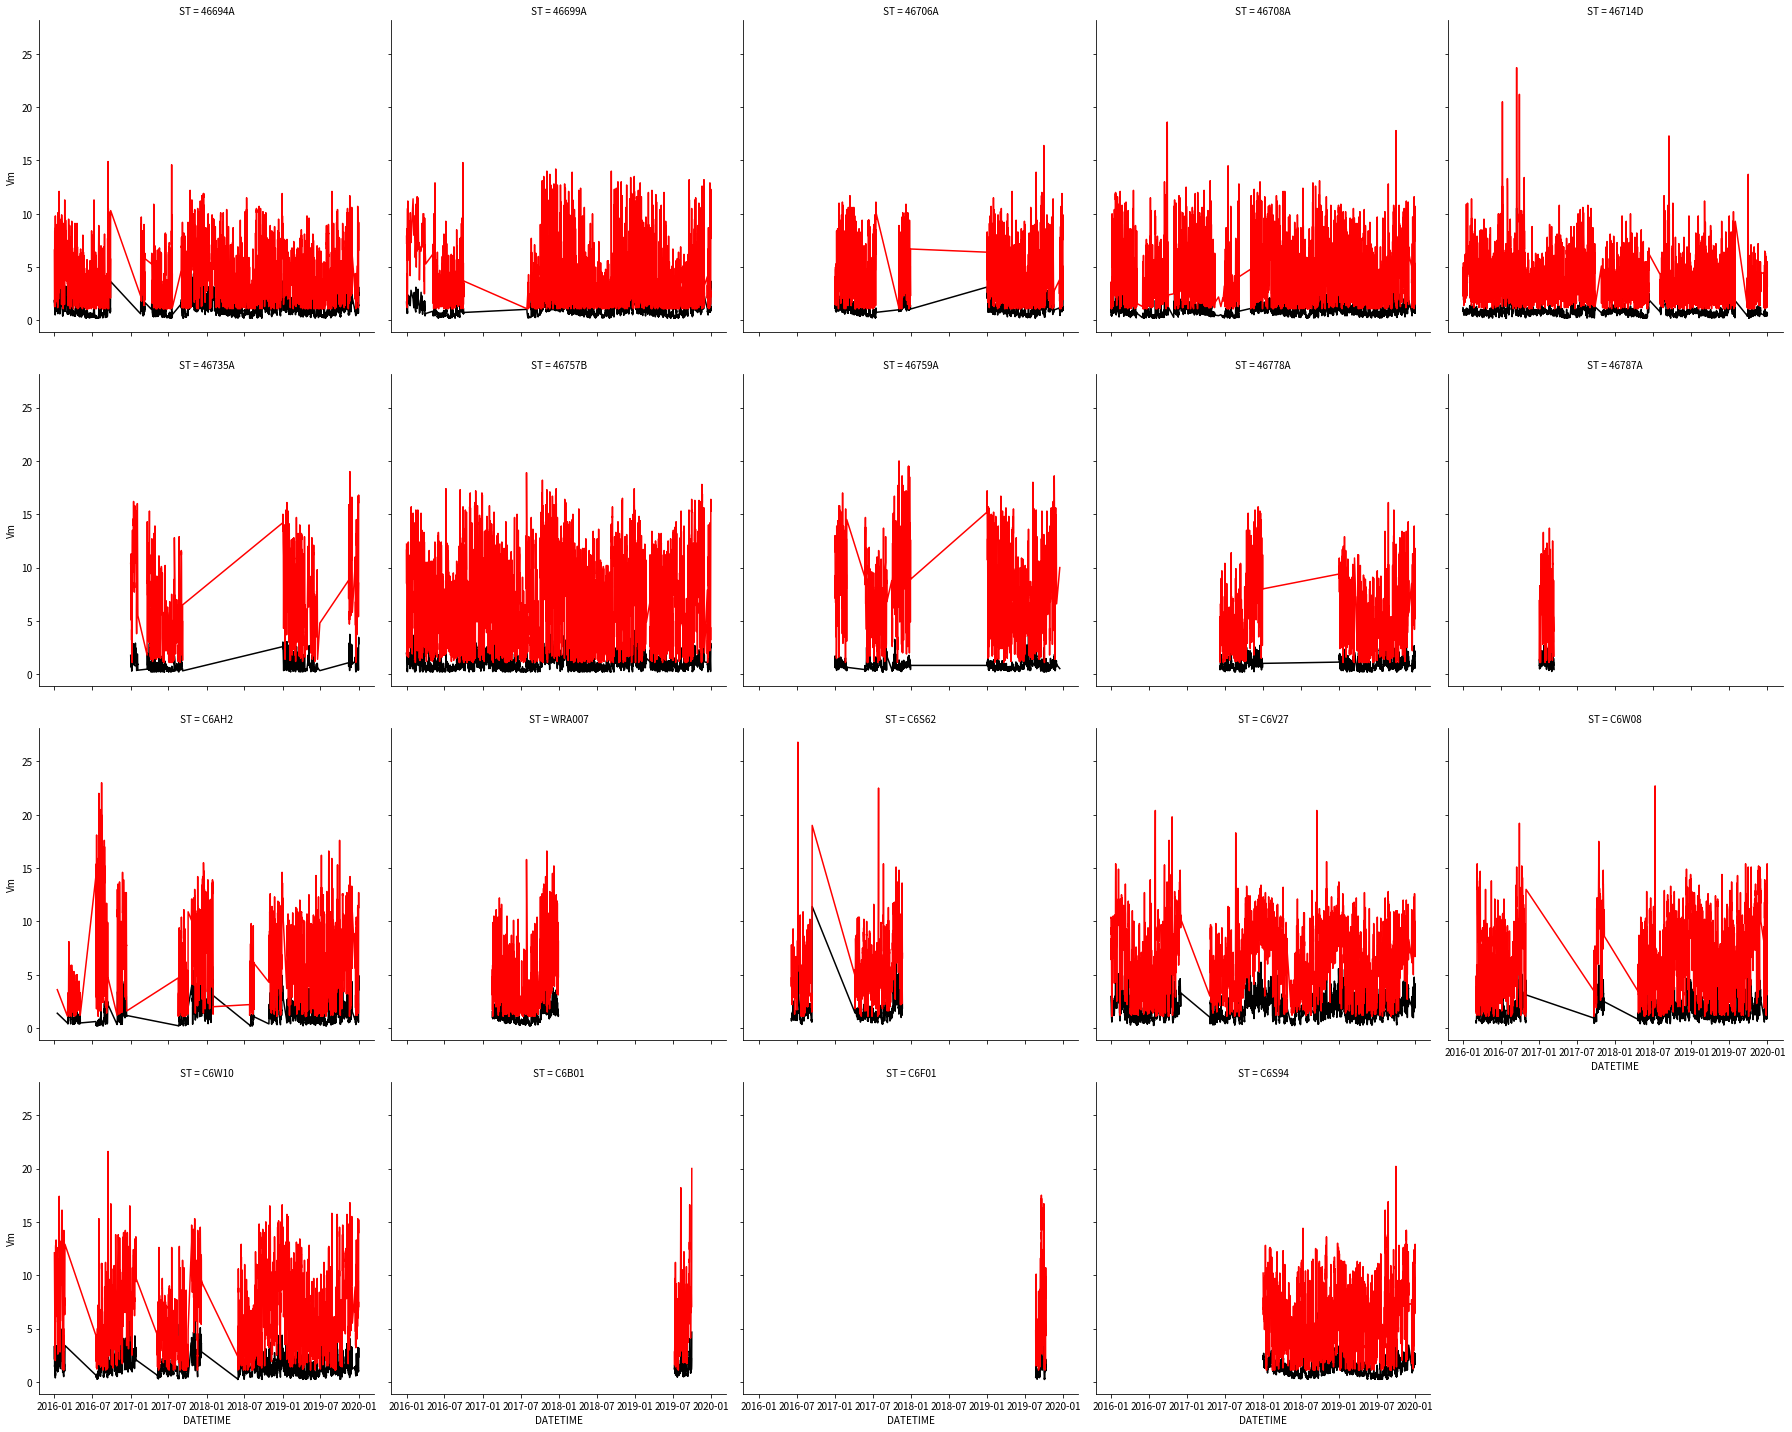

In [12]:
%matplotlib inline
g = sns.FacetGrid(dataset, col="ST", col_wrap=5, height=5)
g.map(sns.lineplot, 'DATETIME','H',color='k')
g.map(sns.lineplot, 'DATETIME','Vm',color='r')
plt.tight_layout()
plt.savefig('VmH_time_series.png',dpi=200)